# Classification

https://themisbo.github.io/PalmerPenguins_Python_scikit-learn.html

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, pairwise_distances, jaccard_score

In [7]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv')
penguins.info(verbose=True)
penguins.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
penguins = penguins.dropna(axis = 0, thresh=4, how = "all")
penguins.info

<bound method DataFrame.info of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g   

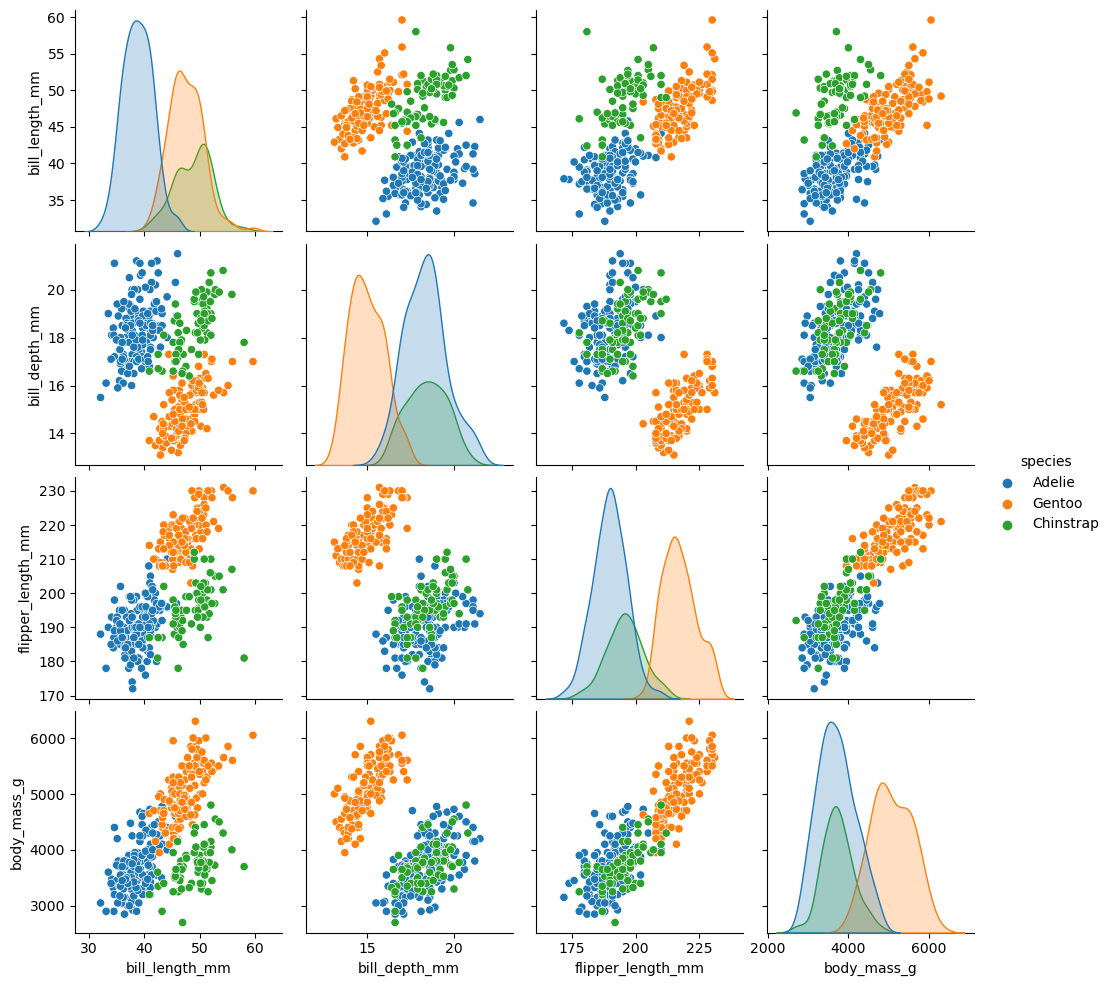

In [9]:
penguins = penguins.drop(columns='year')
sns.pairplot(penguins, hue="species")
species = penguins.pop('species')

In [10]:
print(penguins.shape, species.shape)
X_train, X_test, y_train, y_test = train_test_split(penguins, species, test_size=0.25, random_state=7, stratify=species)

(342, 6) (342,)


              precision    recall  f1-score   support

      Adelie       0.71      0.97      0.82        38
   Chinstrap       1.00      0.06      0.11        17
      Gentoo       0.91      0.97      0.94        31

    accuracy                           0.79        86
   macro avg       0.87      0.67      0.62        86
weighted avg       0.84      0.79      0.72        86



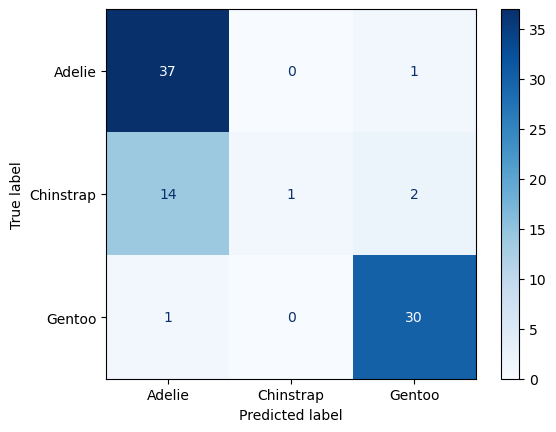

In [15]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# set up pipeline for support vector machine
pipe_svc = Pipeline([ ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)), ('imputer', KNNImputer(n_neighbors=2, weights="uniform")), ('scaler', StandardScaler(with_mean=False)), ('svc', svm.SVC())])

pipe_svc.fit(X_train, y_train)

pipe_svc.score(X_test, y_test)


y_pred_svc = pipe_svc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, cmap=plt.cm.Blues)


print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

      Adelie       0.86      0.66      0.75        38
   Chinstrap       0.62      0.76      0.68        17
      Gentoo       0.86      1.00      0.93        31

    accuracy                           0.80        86
   macro avg       0.78      0.81      0.79        86
weighted avg       0.81      0.80      0.80        86



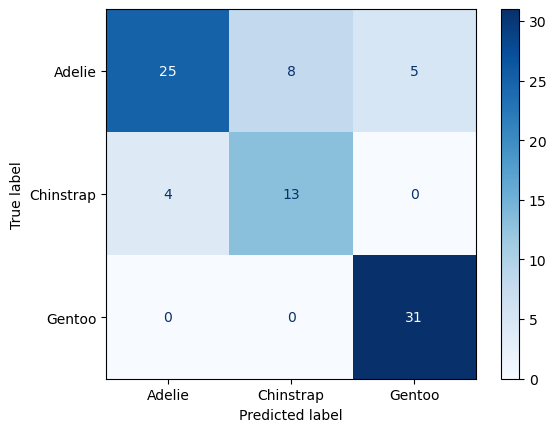

In [16]:

# set up pipeline for decision tree
pipe_tree = Pipeline([ ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)), ('imputer', KNNImputer(n_neighbors=2, weights="uniform")), ('scaler', StandardScaler(with_mean=False)), ('dec_tree', tree.DecisionTreeClassifier())])
pipe_tree.fit(X_train, y_train)
pipe_tree.score(X_test, y_test)


y_pred_tree = pipe_tree.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap=plt.cm.Blues)

print(classification_report(y_test, y_pred_tree))



              precision    recall  f1-score   support

      Adelie       0.74      0.84      0.79        38
   Chinstrap       0.38      0.47      0.42        17
      Gentoo       1.00      0.71      0.83        31

    accuracy                           0.72        86
   macro avg       0.71      0.67      0.68        86
weighted avg       0.76      0.72      0.73        86



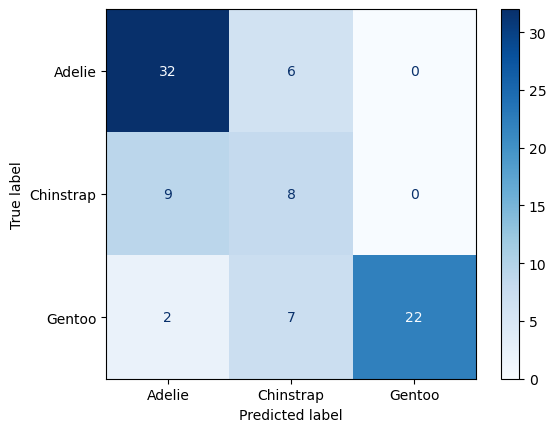

In [17]:

# set up pipeline for KNN
n_neighbors = 5
knn_pipe = Pipeline([ ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)), 
                      ('imputer', KNNImputer(n_neighbors=n_neighbors, weights="uniform")), 
                      ('scaler', StandardScaler(with_mean=False)),
                      ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])
knn_pipe.fit(X_train, y_train)
knn_pipe.score(X_test, y_test)


y_knn = knn_pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_knn, cmap=plt.cm.Blues)

print(classification_report(y_test, y_knn))

